In [1]:
# All libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json as js

Read competitions file to know the Women's EURO id and all the informations

In [2]:
f = open('./data/competitions.json')
  
data = js.load(f)

for i in range(len(data)):
    if data[i]['competition_name'] == "UEFA Women's Euro":
        compet = data[i]

f.close()

Open matches file from competition selected

In [3]:
f = open('./data/matches/%s/%s.json' %(compet['competition_id'], compet['season_id']))

data = js.load(f)

matches = {}

for i in range(len(data)):
    if (data[i]['home_team']['home_team_name'] == "France Women's") or (data[i]['away_team']['away_team_name'] == "France Women's") :
        matches[i] = data[i]

f.close()

In [4]:
for i in matches:
    if matches[i]['competition_stage']['name'] == "Semi-finals":
        sf = matches[i]

Open lineups of semi-final, where the teams' details are

In [5]:
f = open('./data/lineups/%s.json' %sf['match_id'])

lineups = js.load(f)

f.close()


Open events and three-sixty data

In [6]:
f = open('./data/three-sixty/%s.json' %sf['match_id'])

loc = js.load(f)

f.close()

In [7]:
f = open('./data/events/%s.json' %sf['match_id'])

events = js.load(f)

f.close()

Only the first half of the match is available for now...

Let's see all the shots' locations for the first half

In [8]:
shots = {}

for i in range(len(events)):
    if events[i]['type']['name'] == "Shot":
        shots[i] = events[i]

Test plot players' location 

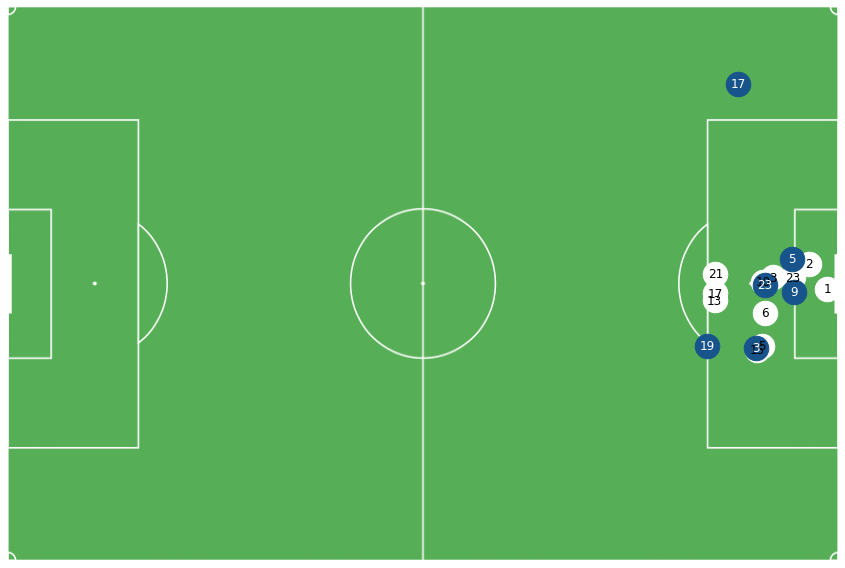

In [30]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True

im = plt.imread("./img/field.png")

fig, ax = plt.subplots()

im = ax.imshow(im, extent=[0, 120, 0, 80])


for i in range(len(shots[147]['shot']['freeze_frame'])):
    if shots[147]['shot']['freeze_frame'][i]['teammate'] == False:
        plt.scatter(shots[147]['shot']['freeze_frame'][i]['location'][0], shots[147]['shot']['freeze_frame'][i]['location'][1], c='white', s=600)
        plt.text(shots[147]['shot']['freeze_frame'][i]['location'][0], shots[147]['shot']['freeze_frame'][i]['location'][1], "%i" %shots[147]['shot']['freeze_frame'][i]['position']['id'], fontsize=12, ha="center", va='center', c='k')

for i in range(len(shots[147]['shot']['freeze_frame'])):
    if shots[147]['shot']['freeze_frame'][i]['teammate'] == True:
        plt.scatter(shots[147]['shot']['freeze_frame'][i]['location'][0], shots[147]['shot']['freeze_frame'][i]['location'][1], c='#17548C', s=600)
        plt.text(shots[147]['shot']['freeze_frame'][i]['location'][0], shots[147]['shot']['freeze_frame'][i]['location'][1], "%i" %shots[147]['shot']['freeze_frame'][i]['position']['id'], fontsize=12, ha="center", va='center', c='w')


plt.xlim(0,120)
plt.ylim(0,80)

ax.axis('off')

plt.show()

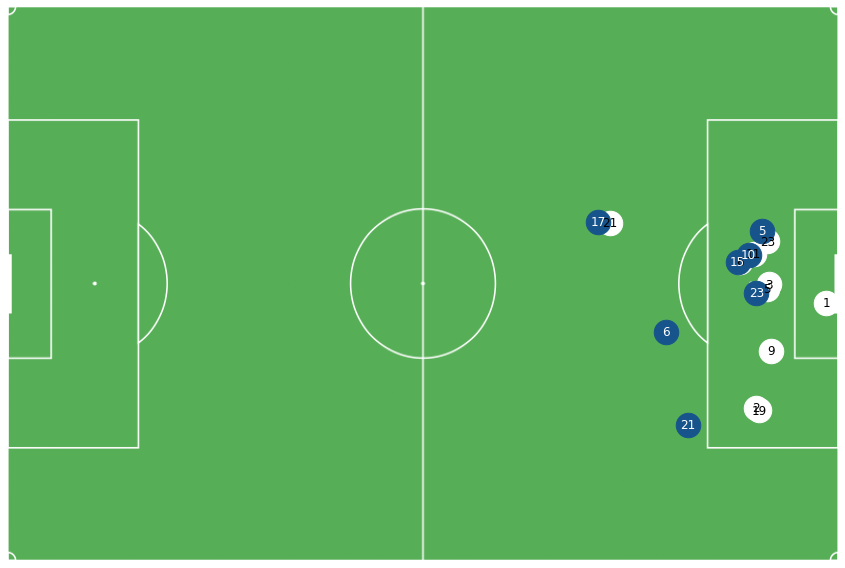

In [32]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True

im = plt.imread("./img/field.png")

fig, ax = plt.subplots()

im = ax.imshow(im, extent=[0, 120, 0, 80])


for i in range(len(shots[690]['shot']['freeze_frame'])):
    if shots[690]['shot']['freeze_frame'][i]['teammate'] == False:
        plt.scatter(shots[690]['shot']['freeze_frame'][i]['location'][0], shots[690]['shot']['freeze_frame'][i]['location'][1], c='white', s=600)
        plt.text(shots[690]['shot']['freeze_frame'][i]['location'][0], shots[690]['shot']['freeze_frame'][i]['location'][1], "%i" %shots[690]['shot']['freeze_frame'][i]['position']['id'], fontsize=12, ha="center", va='center', c='k')

for i in range(len(shots[690]['shot']['freeze_frame'])):
    if shots[690]['shot']['freeze_frame'][i]['teammate'] == True:
        plt.scatter(shots[690]['shot']['freeze_frame'][i]['location'][0], shots[690]['shot']['freeze_frame'][i]['location'][1], c='#17548C', s=600)
        plt.text(shots[690]['shot']['freeze_frame'][i]['location'][0], shots[690]['shot']['freeze_frame'][i]['location'][1], "%i" %shots[690]['shot']['freeze_frame'][i]['position']['id'], fontsize=12, ha="center", va='center', c='w')


plt.xlim(0,120)
plt.ylim(0,80)

ax.axis('off')

plt.show()